# Support Vector Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Importing the dataset

In [2]:
dataset = pd.read_csv('../datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Taking care of missing data

There are no missing values for this dataset. Run `dataset.isna().sum()` for confirming.

## Feature Scaling

In [4]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

In [5]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [6]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the Support Vector Regression model on the whole dataset

In [7]:
svr = SVR(C=1e1, kernel='rbf')

In [8]:
svr.fit(X, y.reshape(len(y), ))

SVR(C=10.0)

## Predicting a new result

In [9]:
standardized_pred = svr.predict(sc_X.transform([[6.5]]))

In [10]:
actual_pred = sc_y.inverse_transform([standardized_pred])

In [11]:
actual_pred

array([[163533.50366252]])

## Visualizing the SVR result

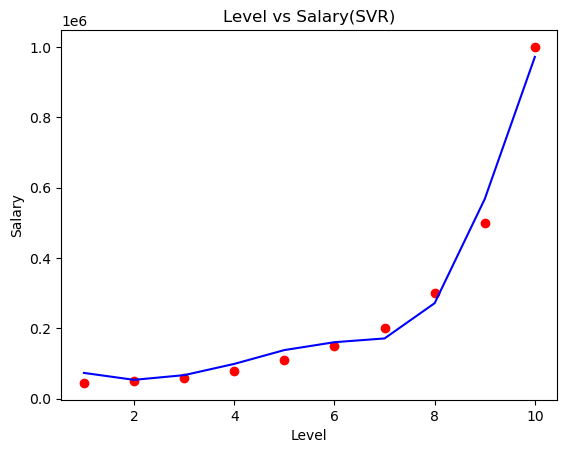

In [12]:
yhat = svr.predict(X)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(yhat.reshape(-1, 1)), color='blue')
plt.title('Level vs Salary(SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()